In [67]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

In [68]:
(trainData,trainLabel),(testData,testLabel) = mnist.load_data()
trainigData = trainData/255
testData = testData/255

In [69]:
# plot image/digit to validate accurracy

Text(0.5, 1.0, 'label=>0')

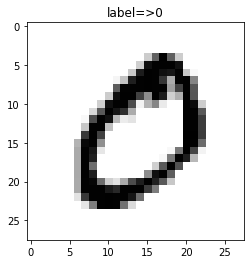

In [70]:
imgIndex = 1
plt.imshow(trainData[imgIndex],cmap=plt.cm.get_cmap('binary')
          )
lbl = trainLabel[imgIndex]
plt.title('label=>'+str(lbl))

In [155]:
model = Sequential()
model.add(Dense(28,input_shape = (28,28),activation='relu'))
model.add(Flatten())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
model.add(Dense(784, activation='relu'))
model.add(Dense(10,activation='softmax'))

# model.summary()

In [156]:
model.compile(Adam(lr=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
trainigData[0].reshape(-1,1).shape

(784, 1)

In [157]:
# train
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 28, 28)            812       
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                7850      
Total params: 624,102
Trainable params: 624,102
Non-trainable params: 0
_________________________________________________________________


In [119]:
def reshapeArr(arr):
    reshapedArr = []
    for i in range(len(arr)):
        reshapedArr.append(arr[i].reshape(-1,1))
        if(len(reshapedArr)==20):
            break
        
    return reshapedArr

In [120]:
formattedAndReshappedData = reshapeArr(trainigData)

In [121]:
formattedAndReshappedData

[array([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [141]:
formattedAndReshappedData[0].shape

(784, 1)

In [159]:
# for i in range(len(formattedAndReshappedData)):
model.fit(trainData,trainLabel,epochs=3,batch_size=20,verbose=2)


Epoch 1/3
 - 243s - loss: 1.2420 - accuracy: 0.9070
Epoch 2/3
 - 150s - loss: 0.2180 - accuracy: 0.9459
Epoch 3/3
 - 127s - loss: 0.1738 - accuracy: 0.9560


In [163]:
model.predict(np.expand_dims(trainData[0],axis=0))

array([[5.5828731e-10, 1.2851823e-09, 3.8757972e-10, 3.3496137e-06,
        4.2863475e-13, 9.9998963e-01, 2.2973580e-11, 7.0391013e-14,
        2.3511062e-08, 7.0121819e-06]], dtype=float32)

In [166]:
np.argmax(np.array([[5.5828731e-10, 1.2851823e-09, 3.8757972e-10, 3.3496137e-06,
        4.2863475e-13, 9.9998963e-01, 2.2973580e-11, 7.0391013e-14,
        2.3511062e-08, 7.0121819e-06]]))

5

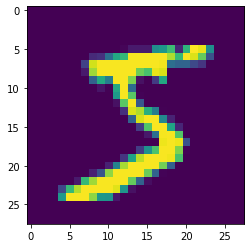

In [167]:
plt.imshow(trainData[0])

In [168]:
model.save('./saveModels/digitsRecogWith10-OUTPUTS/handwrittenDigitsTenOutputs.h5')

In [170]:
model.predict(np.expand_dims(testData[0],axis=0))

array([[0.09509611, 0.08897348, 0.10245264, 0.10663944, 0.09193022,
        0.10536261, 0.08423613, 0.10053137, 0.10807901, 0.11669897]],
      dtype=float32)

In [171]:
np.argmax(np.array([[0.09509611, 0.08897348, 0.10245264, 0.10663944, 0.09193022,
        0.10536261, 0.08423613, 0.10053137, 0.10807901, 0.11669897]]))

9

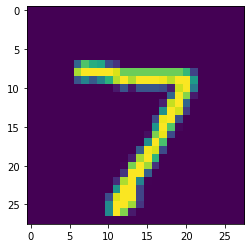

In [172]:
plt.imshow(testData[0])

In [173]:
loss,acc = model.evaluate(testData,testLabel)
print('acc',acc)
print('loss',loss)

10000/10000 [==============================] - 10s 972us/step
acc 0.1932000070810318
loss 2.2692767799377442


In [147]:
from keras.datasets import imdb
imdb.load_data()

17465344/17464789 [==============================] - 61s 4us/step


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [148]:
from keras.datasets import fashion_mnistshion_mnistshion_mnistshion_mnistshion_mnistshion_mnistshion_mnistshion_mnistashion_mnistashion_mnistashion_mnistashion_mnistashion_mnistashion_mnistashion_mnist
fashion_mnist.load_data()

4423680/4422102 [==============================] - 17s 4us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [151]:
from keras.datasets import reuters
reuters.load_data()

Exception: URL fetch failure on https://s3.amazonaws.com/text-datasets/reuters.npz : None -- [Errno -2] Name or service not known